In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [3]:
df= pd.read_csv("D:/python_dir_Jupyter/Project_resume/Shopper's Purchasing cluster/online_shoppers_intention.csv")

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [15]:
# define categorical features
categorical_features = [col for col in df.columns \
                      if pd.api.types.is_string_dtype(df[col])]
print(categorical_features)

['Month', 'VisitorType']


In [59]:
df.sample(7)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8334,0,0.000000,0,0.0,21,987.900000,0.010000,0.016667,0.000000,0.0,Dec,2,4,2,1,Returning_Visitor,False,False
11281,1,39.500000,0,0.0,52,3329.100000,0.012232,0.042470,0.000000,0.0,Nov,2,2,3,10,Returning_Visitor,False,False
11612,1,25.500000,0,0.0,12,122.666667,0.000000,0.014286,0.000000,0.0,Nov,1,1,1,8,New_Visitor,True,False
7186,9,433.800000,2,6.0,28,728.700000,0.000000,0.009804,0.000000,0.0,Oct,2,10,1,3,Returning_Visitor,False,False
160,0,0.000000,0,0.0,23,501.666667,0.008696,0.018841,0.000000,0.6,Feb,1,1,4,2,Returning_Visitor,False,False
2615,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,May,2,2,3,3,Returning_Visitor,False,False
8044,4,64.666667,0,0.0,38,1445.666667,0.000000,0.005263,52.113358,0.0,Nov,2,2,1,2,New_Visitor,False,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### Univariate Analysis

In [60]:
catg_col = ['VisitorType','OperatingSystems','Weekend','SpecialDay','Revenue']

In [11]:
for col in catg_col:
     print(col, "----------------------","frequencies",df[col].value_counts().sort_index(),
    "percentages",df[col].value_counts(normalize=True).sort_index(),sep="\n\n", end="\n\n\n")

VisitorType

----------------------

frequencies

New_Visitor           1694
Other                   85
Returning_Visitor    10551
Name: VisitorType, dtype: int64

percentages

New_Visitor          0.137388
Other                0.006894
Returning_Visitor    0.855718
Name: VisitorType, dtype: float64


OperatingSystems

----------------------

frequencies

1    2585
2    6601
3    2555
4     478
5       6
6      19
7       7
8      79
Name: OperatingSystems, dtype: int64

percentages

1    0.209651
2    0.535361
3    0.207218
4    0.038767
5    0.000487
6    0.001541
7    0.000568
8    0.006407
Name: OperatingSystems, dtype: float64


Weekend

----------------------

frequencies

False    9462
True     2868
Name: Weekend, dtype: int64

percentages

False    0.767397
True     0.232603
Name: Weekend, dtype: float64


SpecialDay

----------------------

frequencies

0.0    11079
0.2      178
0.4      243
0.6      351
0.8      325
1.0      154
Name: SpecialDay, dtype: int64

percentages

0.

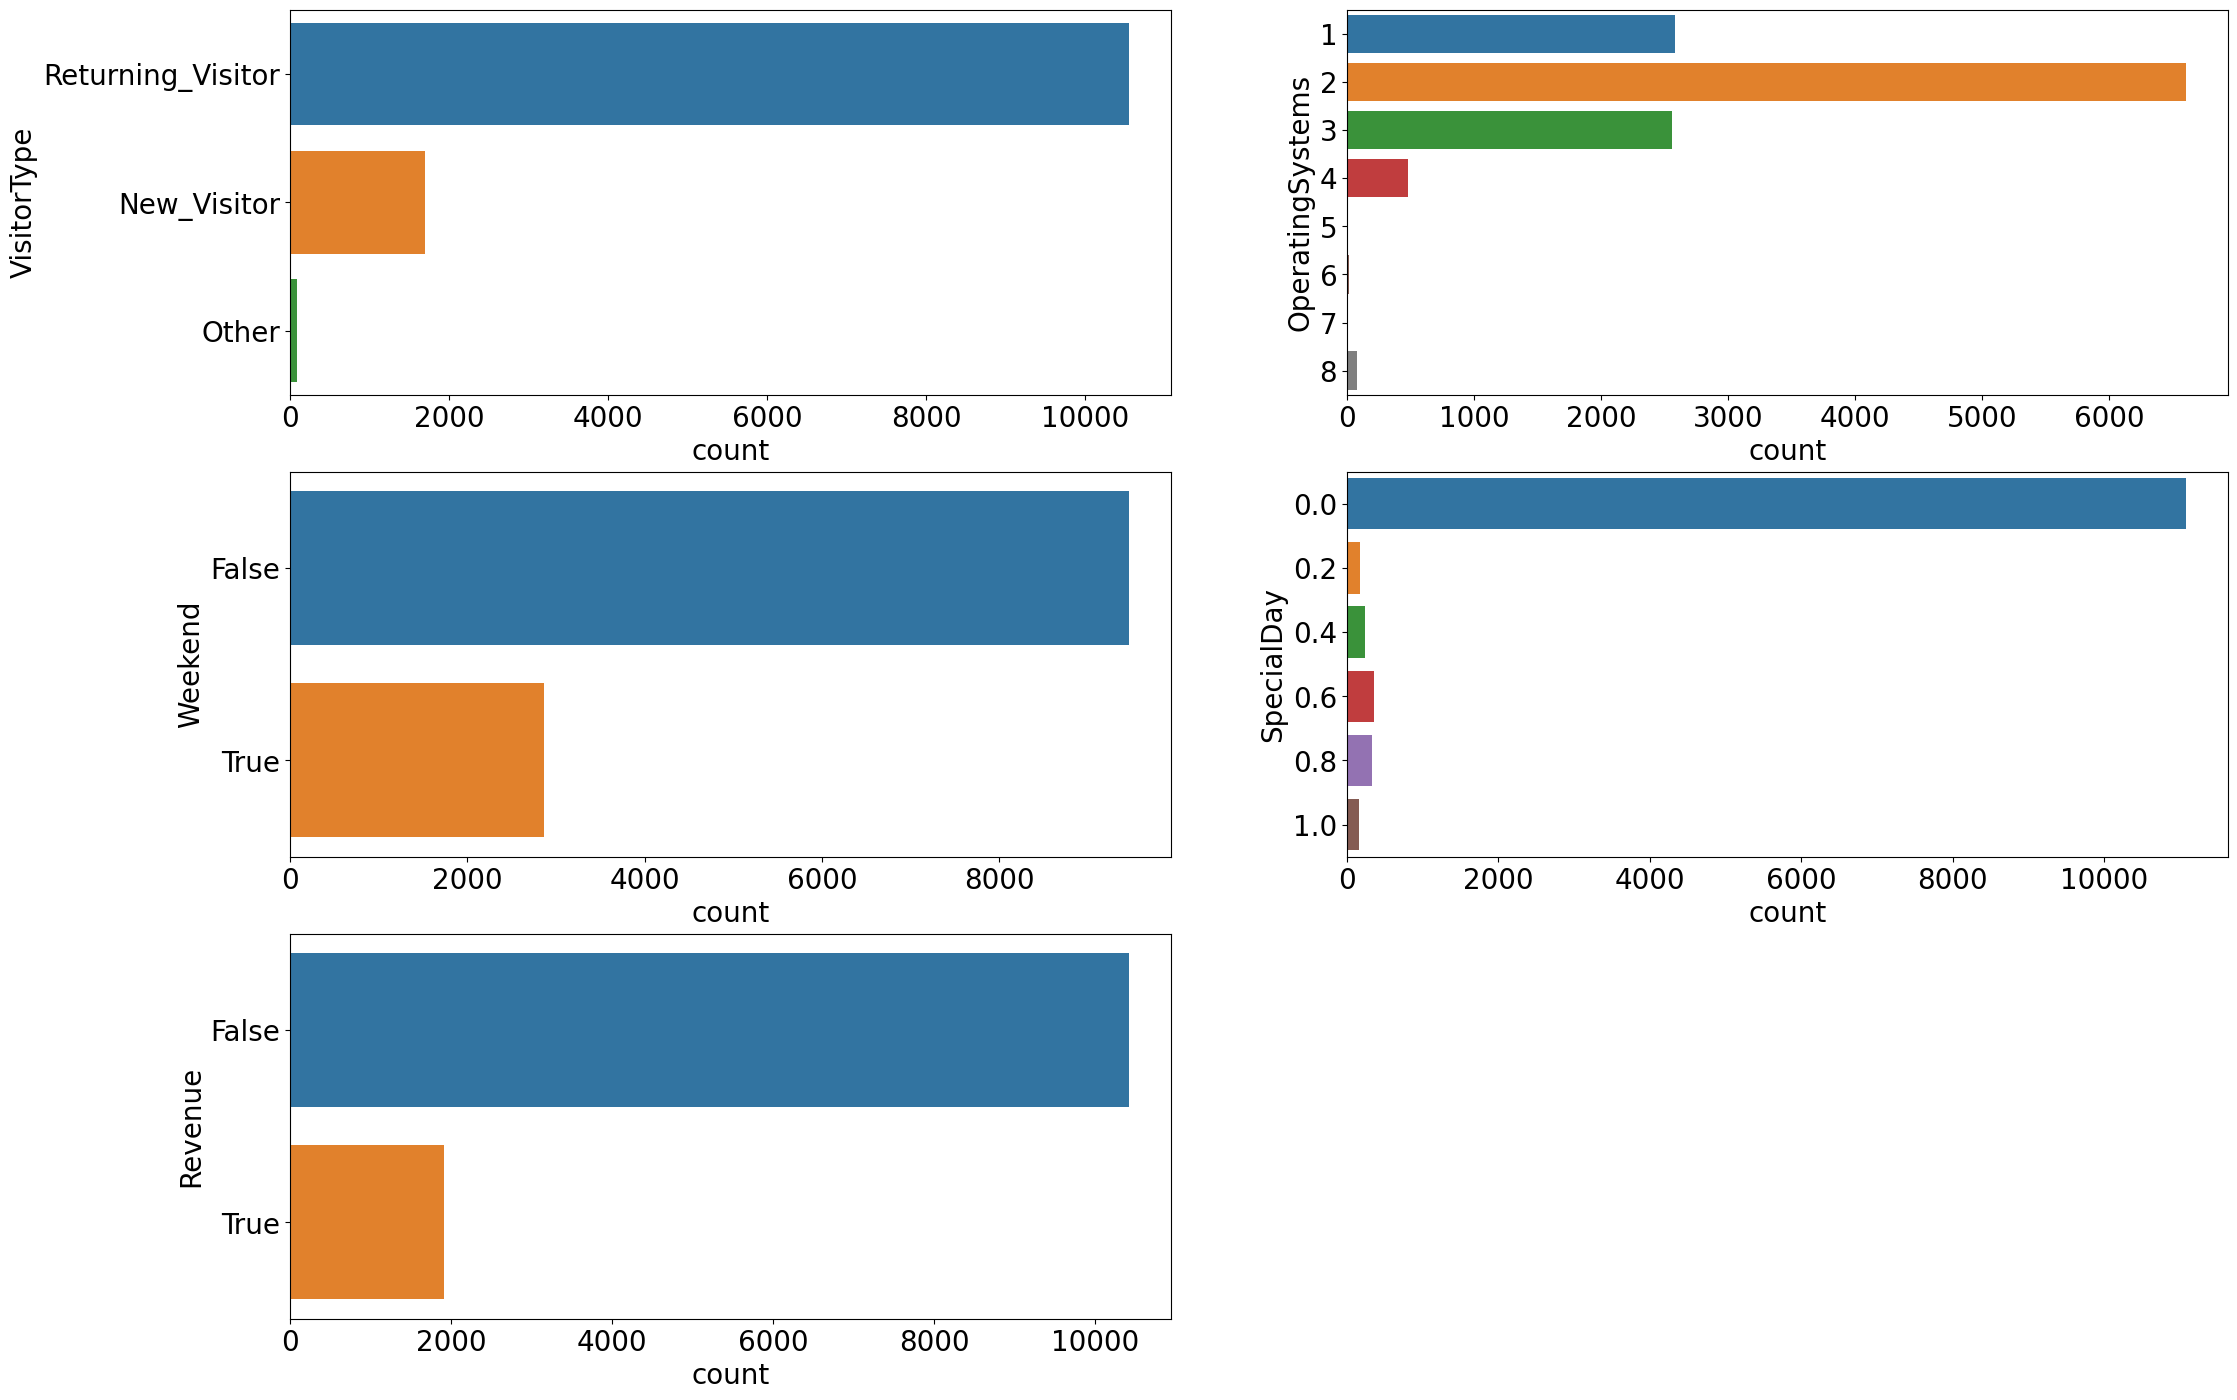

In [26]:
# plot distributions of numerical features
plt.figure(figsize=(25,35))
for index, col in enumerate(catg_col):
    plt.subplot(6, 2, index+1)
    ax = sns.countplot(y=col, data=df)
    ax.set_xlabel("count", fontsize=20)
    ax.set_ylabel(col, fontsize=20)
    ax.tick_params(labelsize=20)



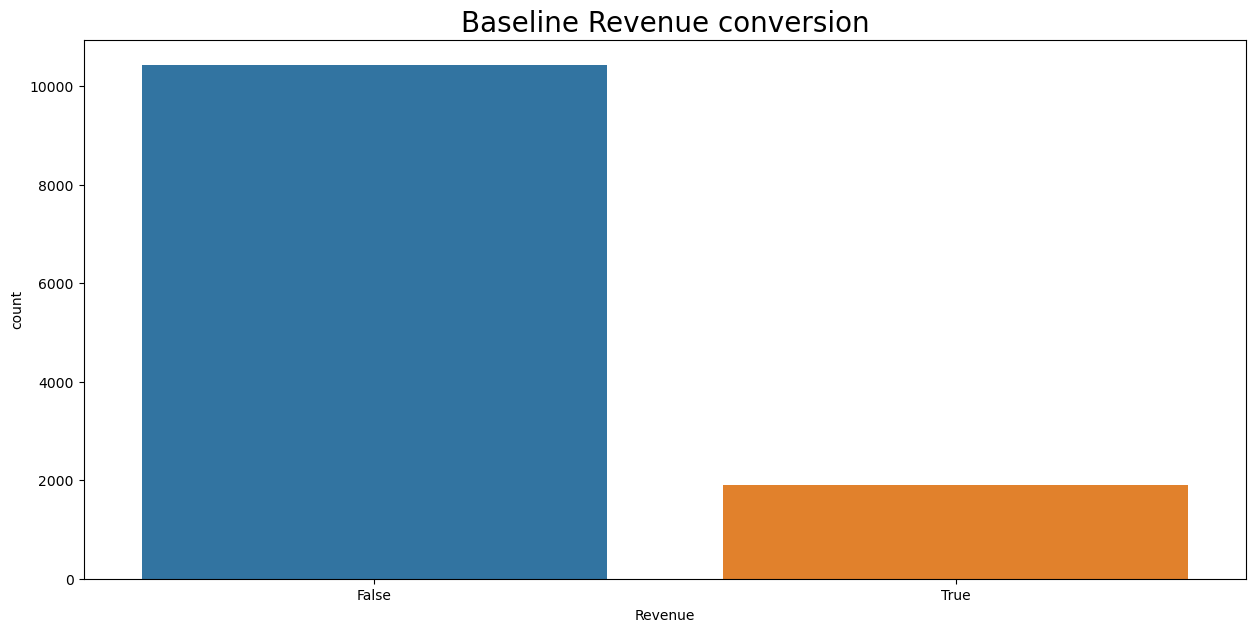

In [25]:
sns.countplot(df['Revenue'])
plt.title('Baseline Revenue conversion', fontsize = 20)
plt.show()

we can see that False has a higher number count than True.

In [28]:
print(df['Revenue'].value_counts())
print()
print(df['Revenue'].value_counts(normalize=True))

False    10422
True      1908
Name: Revenue, dtype: int64

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


A total of 1,908 customers ended up making a purchase, while 10,422 customers did not.

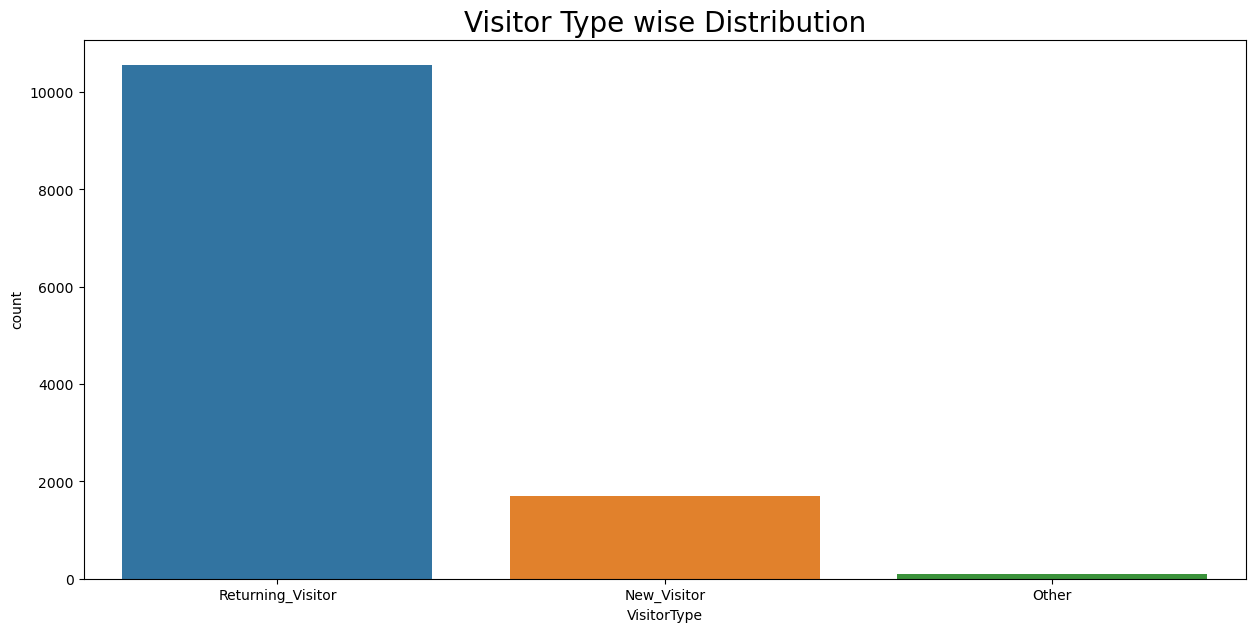

In [29]:
sns.countplot(df['VisitorType'])
plt.title('Visitor Type wise Distribution', fontsize = 20)
plt.show()

In [30]:
print(df['VisitorType'].value_counts())
print()
print(df['VisitorType'].value_counts(normalize=True))

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64


The number of returning customers is higher than that of new visitors. This is good news as it means we have been successful in attracting customers back to our website.

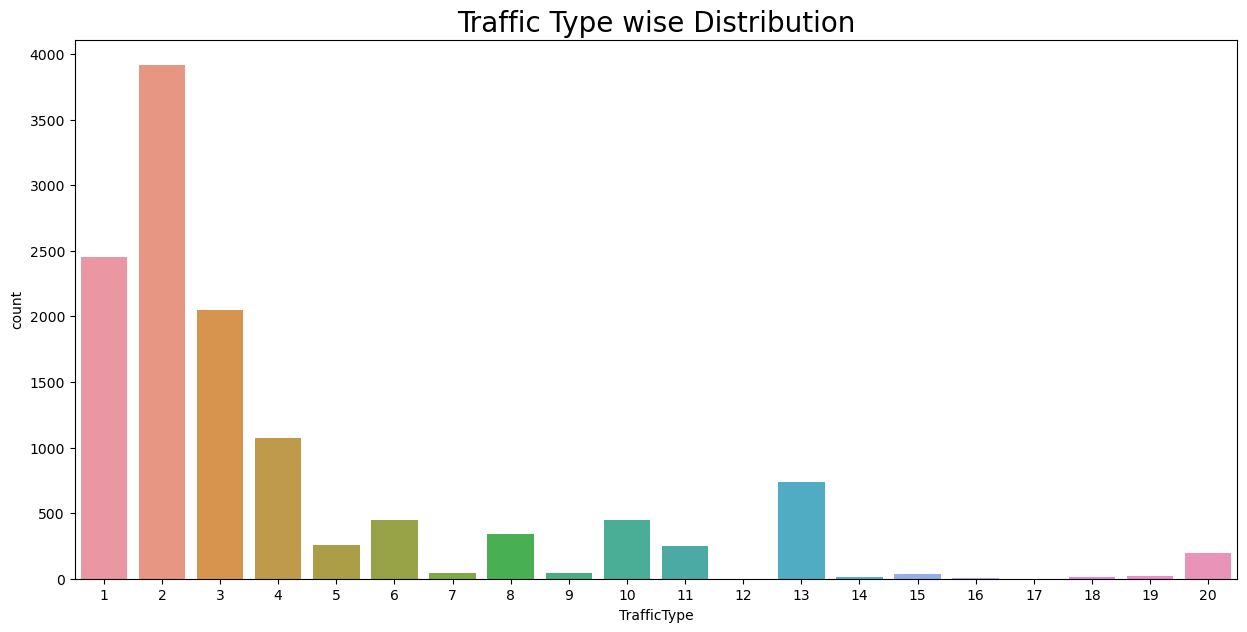

In [27]:
sns.countplot(df['TrafficType'])
plt.title('Traffic Type wise Distribution', fontsize = 20)
plt.show()

In [42]:
print(df['TrafficType'].value_counts(normalize=True))

2     0.317356
1     0.198783
3     0.166423
4     0.086699
13    0.059854
10    0.036496
6     0.036010
8     0.027818
5     0.021087
11    0.020032
20    0.016058
9     0.003406
7     0.003244
15    0.003082
19    0.001379
14    0.001054
18    0.000811
16    0.000243
12    0.000081
17    0.000081
Name: TrafficType, dtype: float64


From the preceding information, we can see that sources 2, 1, 3, and 4 account for the majority of our web traffic.

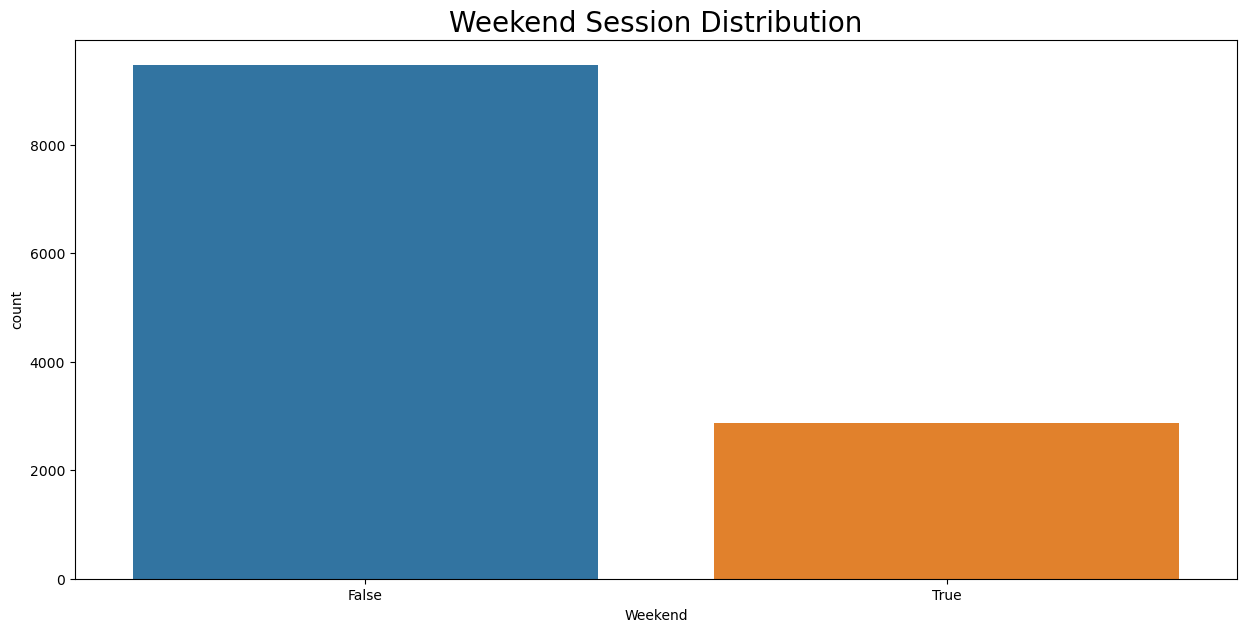

In [39]:
sns.countplot(df['Weekend'])
plt.title('Weekend Session Distribution', fontsize = 20)
plt.show()

In [40]:
print(df['Weekend'].value_counts())
print()
print(df['Weekend'].value_counts(normalize=True))

False    9462
True     2868
Name: Weekend, dtype: int64

False    0.767397
True     0.232603
Name: Weekend, dtype: float64


From the count of the False subcategory, we can see that more visitors visit during weekdays than weekend days.

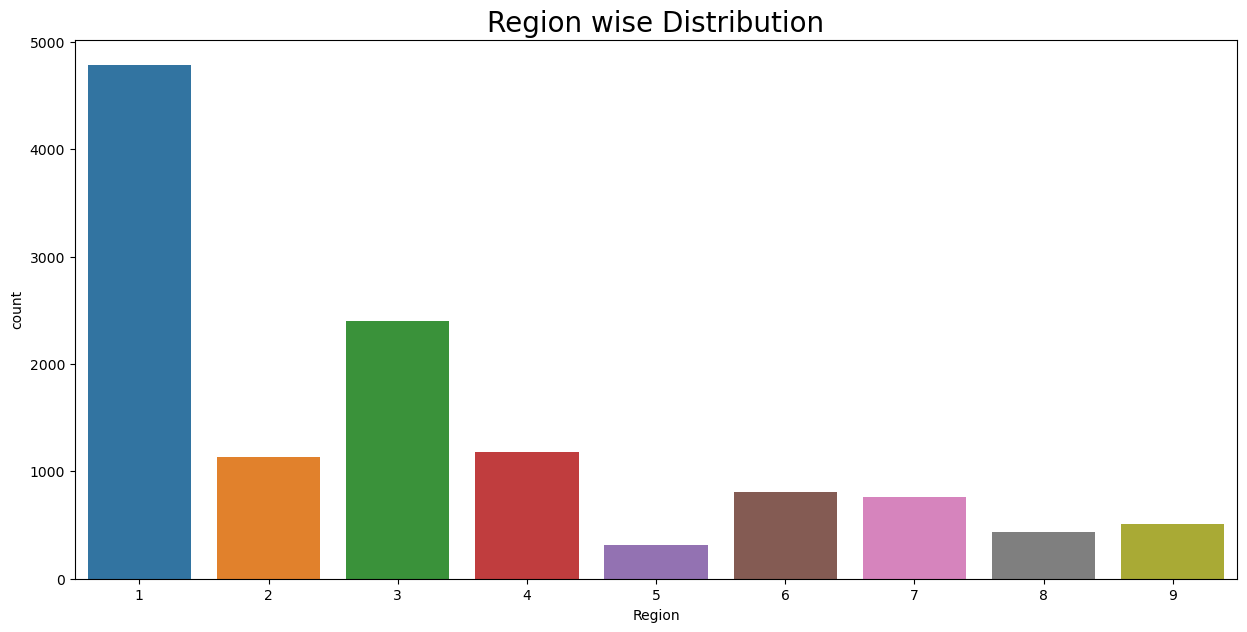

In [28]:
sns.countplot(df['Region'])
plt.title('Region wise Distribution', fontsize = 20)
plt.show()

In [41]:
print(df['Region'].value_counts())
print()
print(df['Region'].value_counts(normalize=True))

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

1    0.387672
3    0.194891
4    0.095864
2    0.092133
6    0.065288
7    0.061719
9    0.041444
8    0.035199
5    0.025791
Name: Region, dtype: float64


From the preceding data, we can see that regions 1 and 3 account for 50% of online sessions; thus, we can infer that regions 1 and 3 
are where most potential consumers reside. 
With this information, we can target our marketing campaigns better.

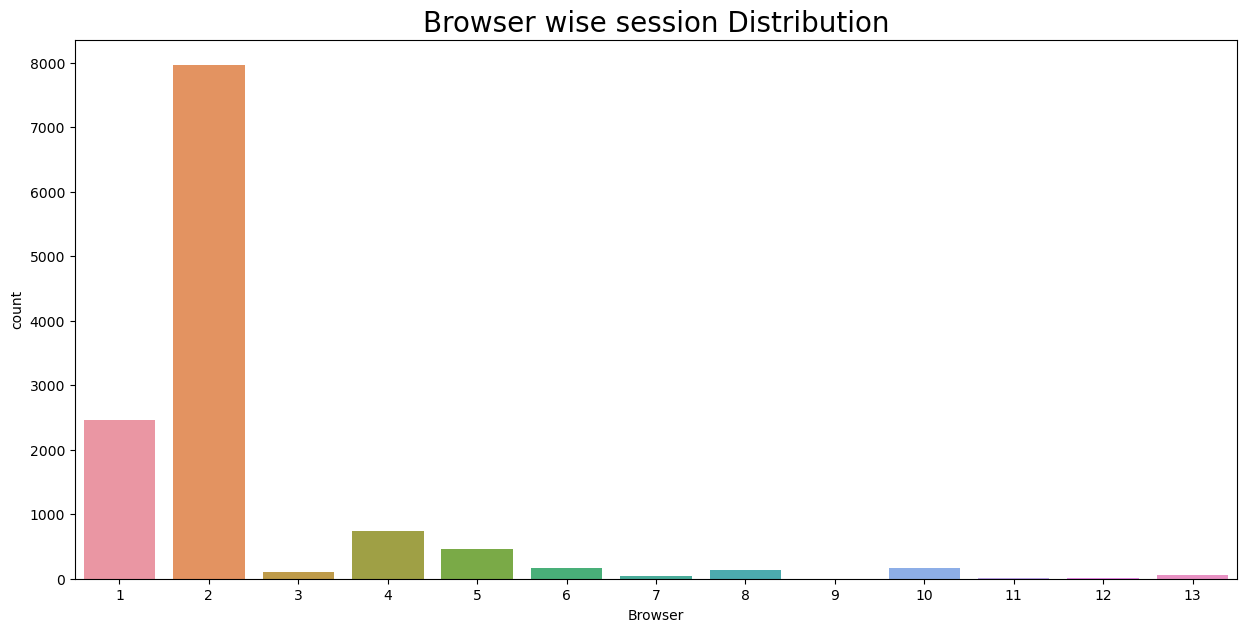

In [29]:
sns.countplot(df['Browser'])
plt.title('Browser wise session Distribution', fontsize = 20)
plt.show()

In [43]:
print(df['Browser'].value_counts())
print()
print(df['Browser'].value_counts(normalize=True))

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

2     0.645661
1     0.199676
4     0.059692
5     0.037875
6     0.014112
10    0.013220
8     0.010949
3     0.008516
13    0.004947
7     0.003974
12    0.000811
11    0.000487
9     0.000081
Name: Browser, dtype: float64


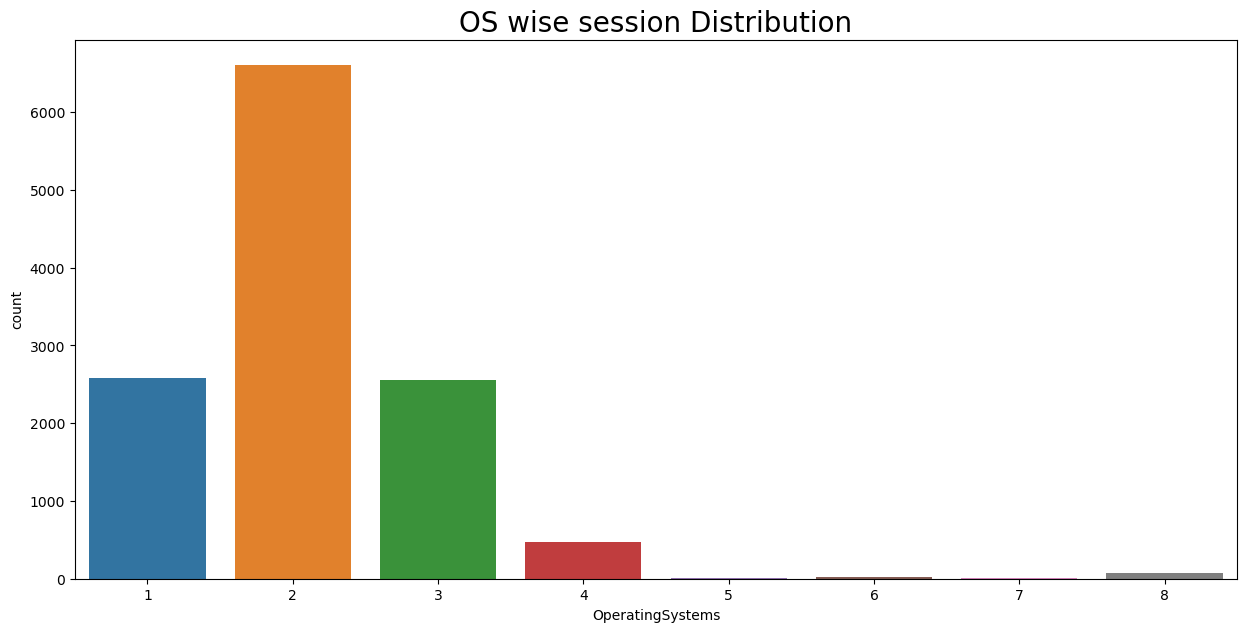

In [30]:
sns.countplot(df['OperatingSystems'])
plt.title('OS wise session Distribution', fontsize = 20)
plt.show()

In [44]:
print(df['OperatingSystems'].value_counts())
print()
print(df['OperatingSystems'].value_counts(normalize=True))

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

2    0.535361
1    0.209651
3    0.207218
4    0.038767
8    0.006407
6    0.001541
7    0.000568
5    0.000487
Name: OperatingSystems, dtype: float64


If we know which OS type is the most predominant, we can ask the tech team to configure the website for that particular OS and take the
necessary actions, such as explicitly defining CSS for that particular OS.

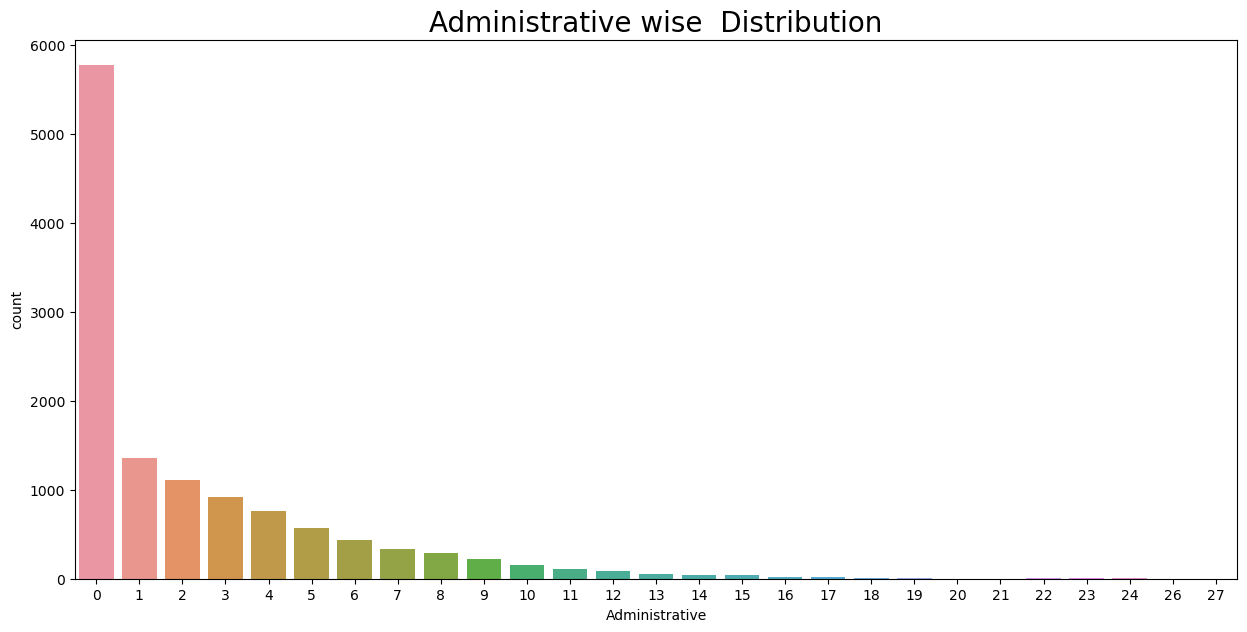

In [31]:
sns.countplot(df['Administrative'])
plt.title('Administrative wise  Distribution', fontsize = 20)
plt.show()

#### Bivariate Analysis

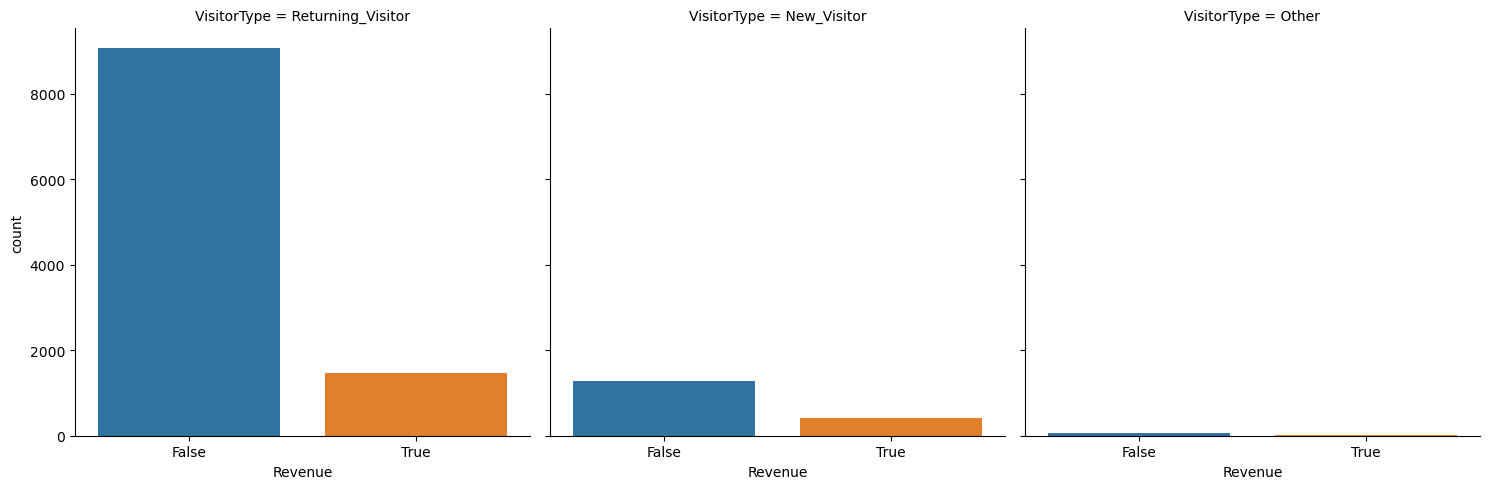

In [45]:
g = sns.catplot("Revenue", col="VisitorType", col_wrap=3,\
data=df,kind="count", height=5, aspect=1)
plt.show()

As you can see, more revenue conversions happen for returning customers than new customers. This clearly implies that we need to find
ways to incentivize new customers to make a transaction with us

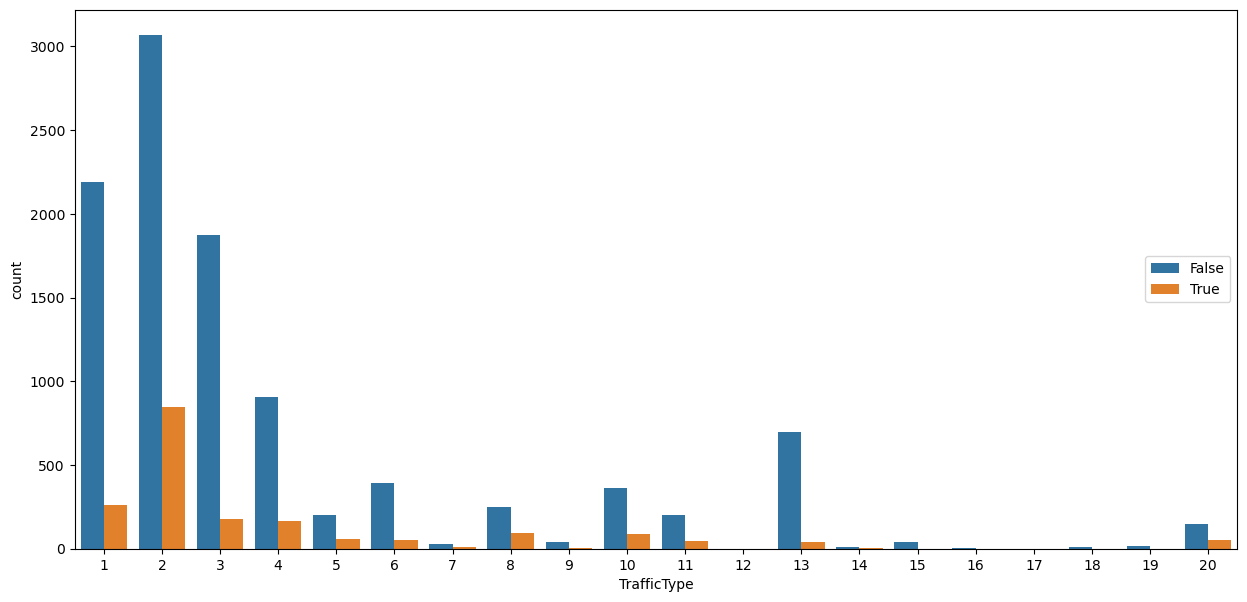

In [46]:
sns.countplot(x="TrafficType", hue="Revenue", data=df)
plt.legend(loc='right')
plt.show()

From the preceding plot, we can see that more revenue conversion happens for web traffic generated from source 2. Even though source
13 generated a considerable amount of web traffic, conversion is very low compared to others

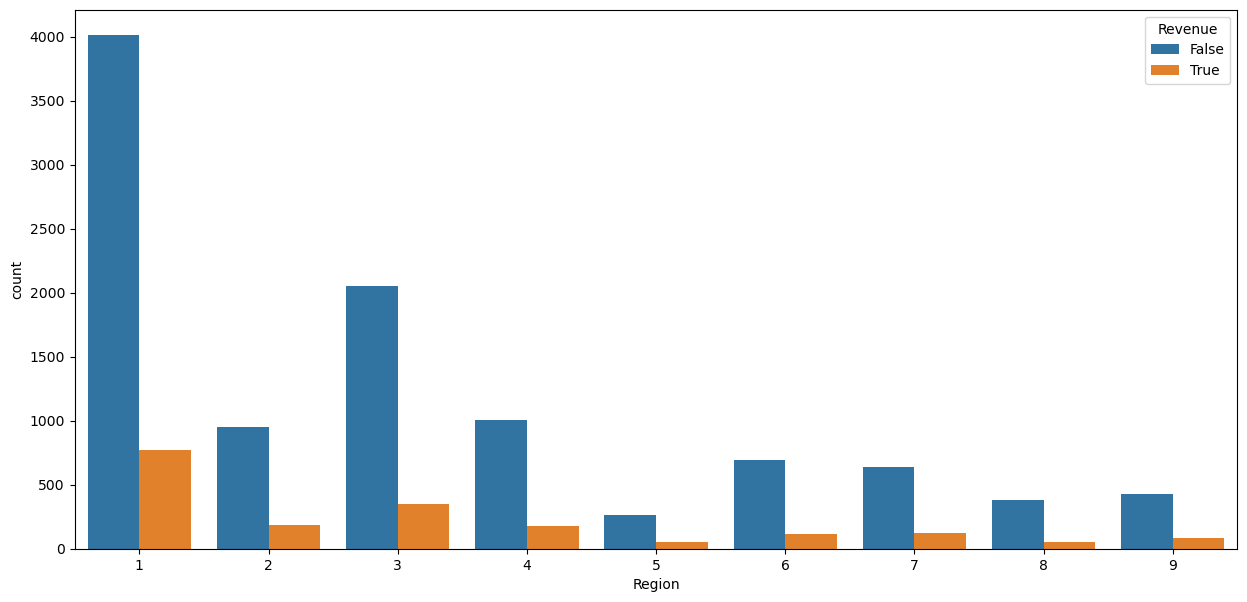

In [47]:
sns.countplot(x="Region", hue="Revenue", data=df)
plt.show()

From the preceding plot, we can see that region 1 accounts for most sales, and region 3 the second most. With this information, we
can plan our marketing and supply chain activities in a better way. For example, we might propose building a warehouse
specifically catering to the needs of region 1 to increase delivery rates and ensure that products in the highest demand are always
well stocked.

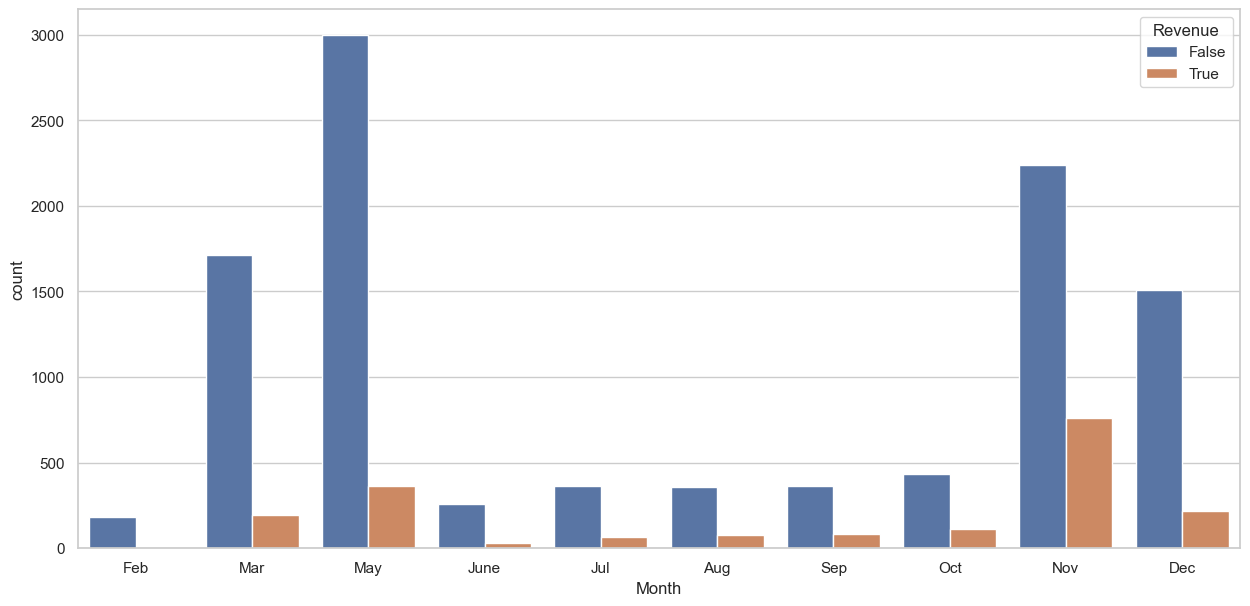

In [51]:
sns.countplot(x="Month", hue="Revenue", data=df,order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

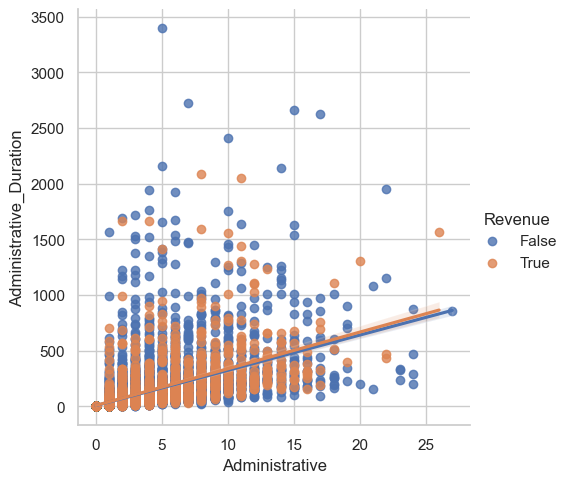

In [54]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="Administrative", y="Administrative_Duration",\
hue='Revenue', data=df)

From the preceding plot, we can infer that administrative-related pageviews and the administrative-related pageview duration are
positively correlated. When there is an increase in the number of administrative pageviews, the administrative pageview duration also
increases.

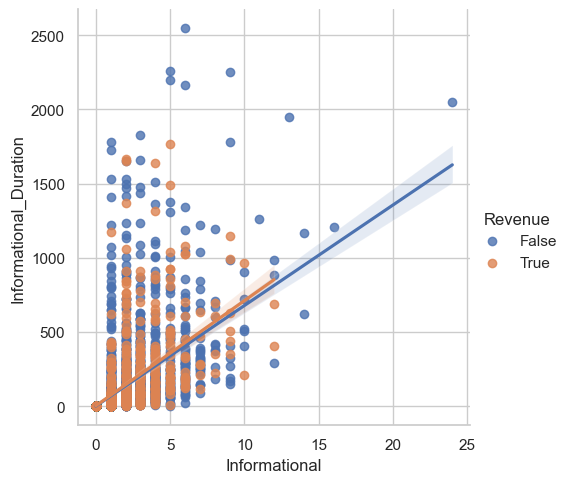

In [56]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="Informational", y="Informational_Duration",\
hue='Revenue', data=df)

From the preceding plot, we can conclude the following:
- Information page views and information pageview duration are positively correlated. With an increase in the number of information pageviews, the information pageview duration also increases.
- Customers who have made online purchases visited fewer numbers of informational pages. This implies that informational pageviews don't have much effect on revenue generation.

In [57]:
df.iloc[:, [1, 6]].head(2)

,Administrative_Duration,BounceRates
0,0.0,0.2
1,0.0,0.0


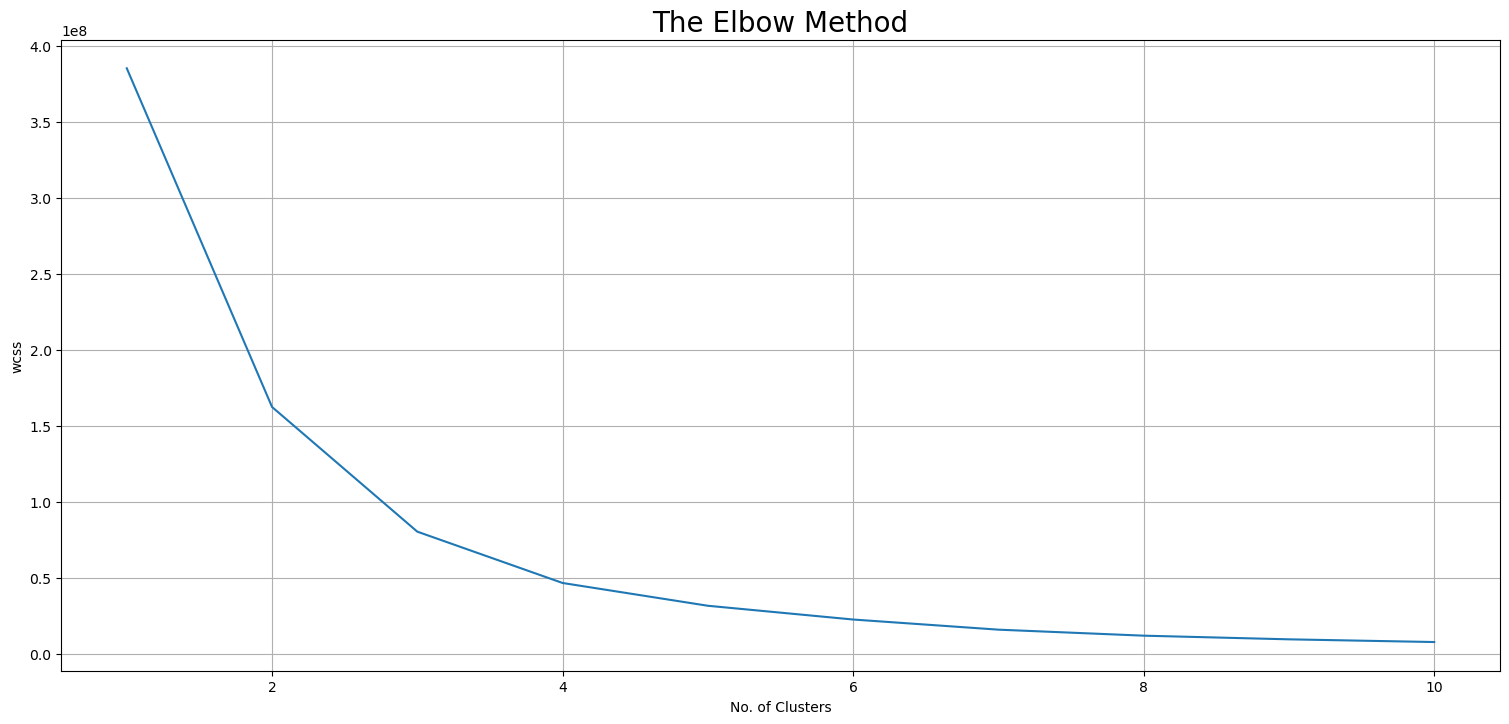

In [20]:
# Administrative duration vs Bounce Rate
x = df.iloc[:, [1, 6]].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

From the preceding elbow graph, we can see that k=2 is the optimum value for clustering. Now, let's run k-means clustering with k=2:

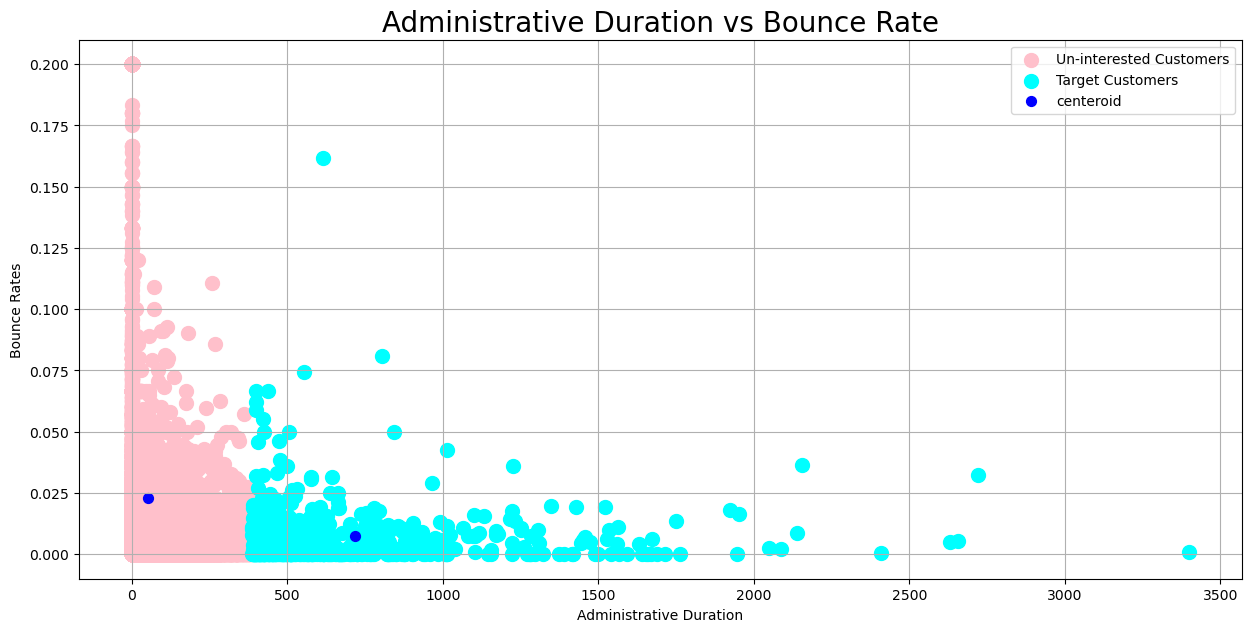

In [21]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

From the preceding graph, we can infer that the uninterested customer spends much less time in administrative pages compared
with target customers

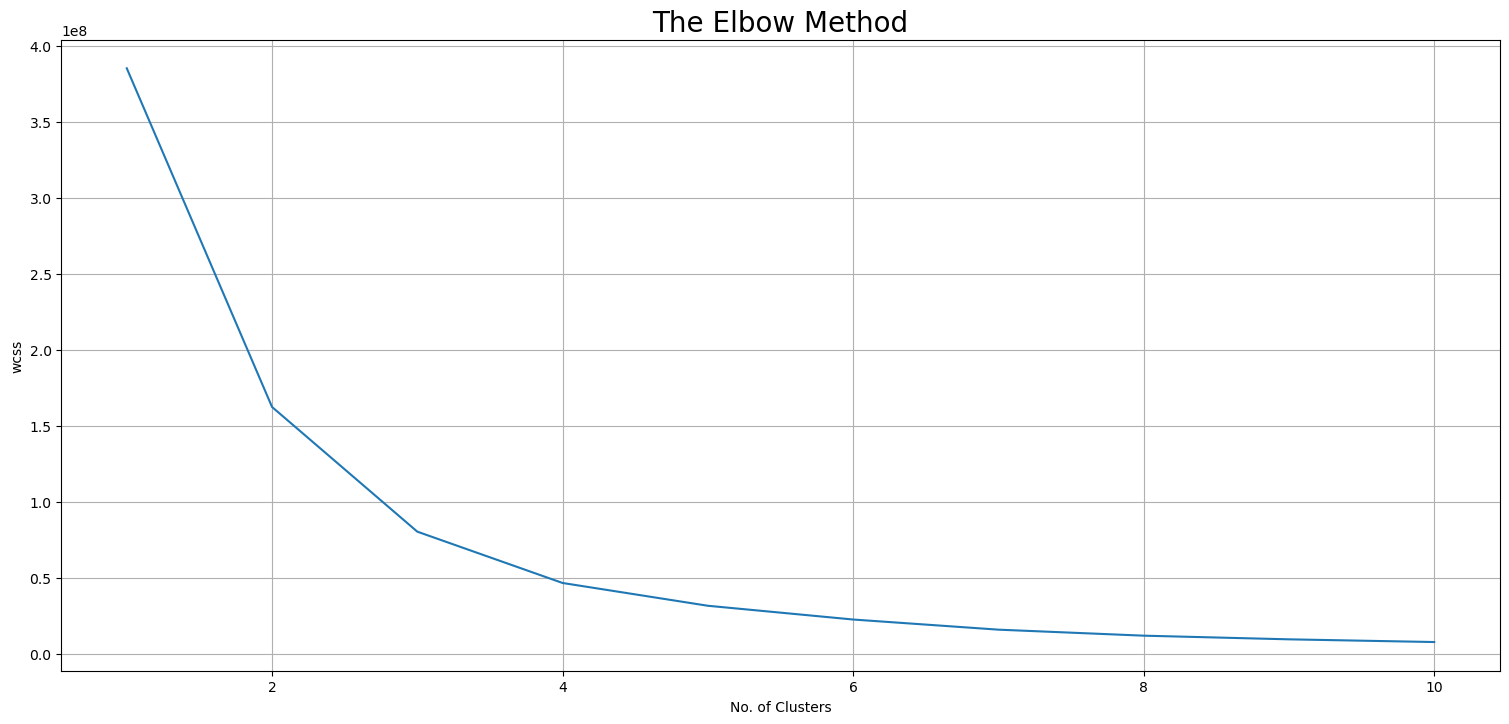

In [23]:
# Administrative duration vs Exit Rate
x = df.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

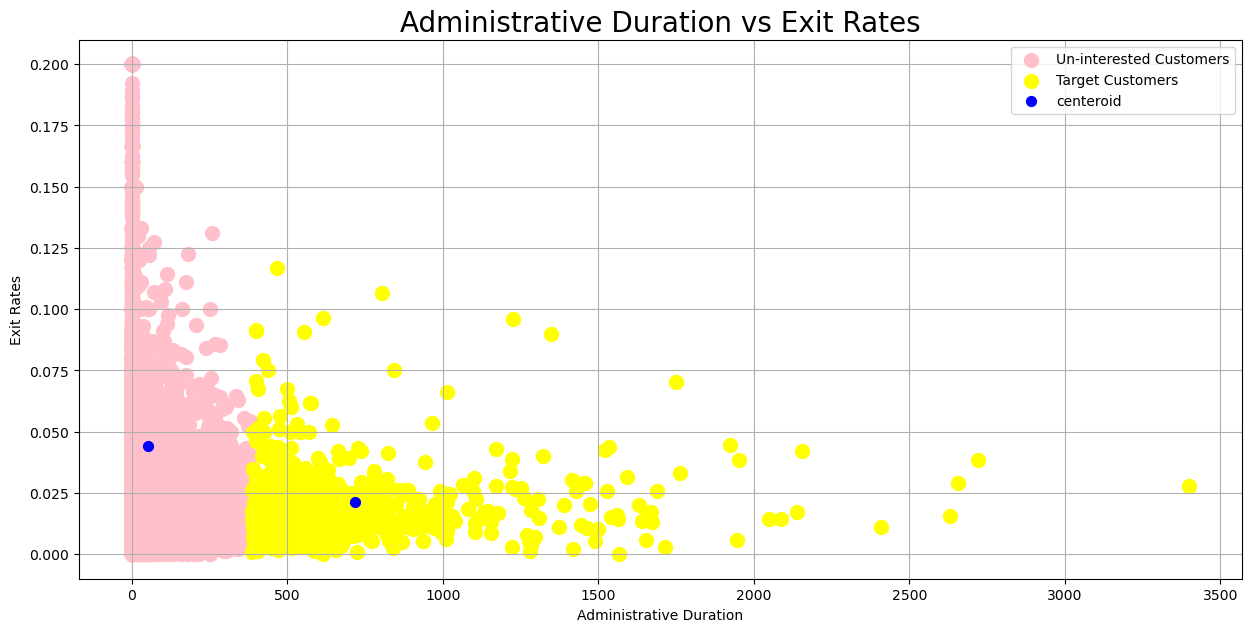

In [24]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

From the preceding graph, we can infer that the uninterested customer exit the page higher than target customers